# 4. Mallas e Integración 2D
#### Integral:
$$\iint \limits_{\Omega} \left(sin(\pi x) \cdot cos^2(\pi y)\right) d\Omega$$
#### Dominio: 
$$\Omega = \left\lbrace 0, 5 \right\rbrace \times \left\lbrace 0, 2 \right\rbrace \ \cup \ \left\lbrace 2, 7 \right\rbrace \times \left\lbrace 2, 4 \right\rbrace$$

Para la integración 2D con el Método de Cuadraturas Gaussianas se hace uso de la función ***gaussian_integration_2D*** creada por **© Daniel Giraldo Cuartas 2022**:

In [59]:
import numpy as np
import sympy as sym
import pyvista as pv
import meshio

def gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny):
    '''
        - p0, p1, p2, p3:
            Coordenadas de los punto (x,y) del cuadrilatero
        
        - fun:
            Funcion lambda f(x,y) a interpolar
            
        - nx, ny:
            Numero de puntos de cuadratura a utilizar en direccion
            x, y respectivamente.
    '''
    xi, wi = np.polynomial.legendre.leggauss(nx)
    yj, wj = np.polynomial.legendre.leggauss(ny)
    
    X = np.matrix([p0, p1, p2, p3])
    
    
    Nt = lambda r,s : 0.25*np.array([
        (1-r)*(1-s),
        (1+r)*(1-s),
        (1+r)*(1+s),
        (1-r)*(1+s)
        ])
    
    Dt = lambda r,s : 0.25*np.array([
        [s-1, r-1],
        [1-s, -1-r],
        [1+s, 1+r],
        [-1-s, 1-r]
        ]).transpose()
    
    integral = 0
    for i in range(nx):
        rx = xi[i]
        wx = wi[i]
        for j in range(ny):
            sy = yj[j]
            wy = wj[j]
            
            J = Dt(rx, sy)*X
            det_J = np.linalg.det(J)
            
            x_vec = Nt(rx, sy)*X
            f_val = fun(x_vec[0,0], x_vec[0,1])
            integral += (f_val)*det_J*wx*wy
            
    return integral

El dominio de integracion $\Omega$ corresponde al mostrado en la siguiente figura. Para almacenar este dominio, se hace una malla con dos rectangulos apartir de los puntos dados.  

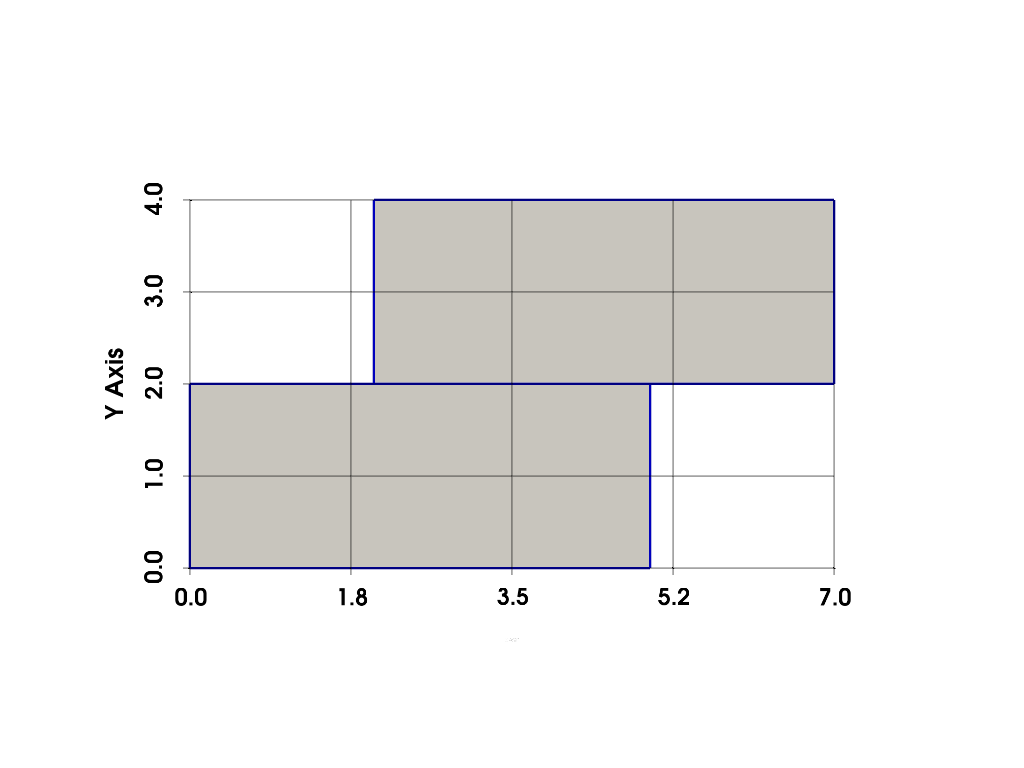

In [93]:
points = np.array([
    [0,0], 
    [5,0],
    [5,2],
    [0,2],
    ##
    [2,2],
    [7,2],
    [7,4],
    [2,4]
], dtype='float32')

rectangles = np.array([
    [0,1,2,3],
    [4,5,6,7],
], dtype='int32')

cells = [("quad", rectangles)]
original_mesh = meshio.Mesh(points, cells)

original_mesh_pv = pv.wrap(original_mesh)

pl = pv.Plotter()
pl.add_mesh(original_mesh_pv, color='white')
pl.add_mesh(original_mesh_pv, color="blue", style='wireframe', line_width=3)
pl.view_xy()
pl.show_grid()
pl.show(jupyter_backend='pythreejs')

A continuación se procede a subdividir en rectangulos la malla anterior en dos mallas estructuradas (a partir de los dos rectangulos que se tenían anteriormente) según la cantidad de rectangulos que se deseen en cada una de las dos direcciones. 

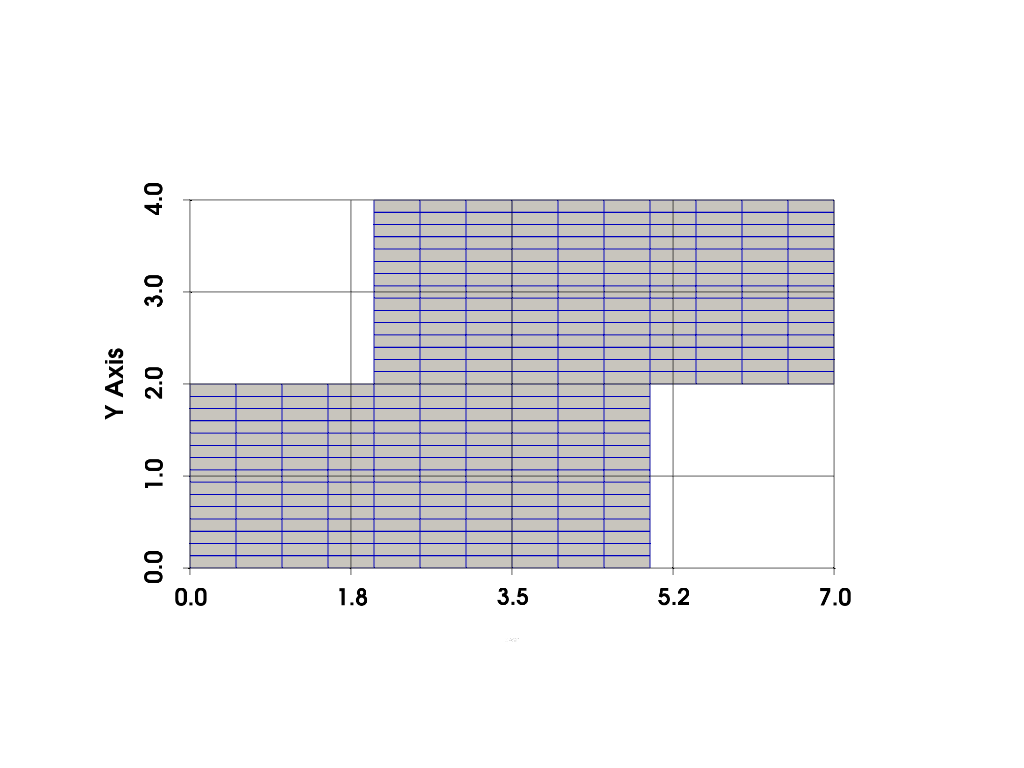

In [92]:
n = 10
z = 15

ps = []
rs = []

for m in range(len(rectangles)):
    xs = np.linspace(points[rectangles[m][0]][0], points[rectangles[m][1]][0], n+1)
    ys = np.linspace(points[rectangles[m][0]][1], points[rectangles[m][2]][1], z+1)
    for j in range(z+1):
        for i in range(n+1):
            ps.append([xs[i], ys[j]])
            
            if (j == z)|(i == n):
                pass
            else:
                n1 = (j*n + j + i) + m*(n+1)*(z+1)
                n2 = n1 + 1
                n3 = n2+n+1
                n4 = n3-1
                rs.append([n1, n2, n3, n4]) 

cells = [("quad", rs)]
mesh = meshio.Mesh(ps, cells)

mesh_pv = pv.wrap(mesh)

pl2 = pv.Plotter()
pl2.add_mesh(mesh_pv, color='white')
pl2.add_mesh(mesh_pv, color="blue", style='wireframe', line_width=1.5)
pl2.view_xy()
pl2.show_grid()
pl2.show(jupyter_backend='pythreejs')

Seguidamente se procede a realizar una integración con el método de cuadraturas gaussianas para cada rectangulo para posteriormente sumar cada resultado y hallar el valor de la integral requerida.

In [14]:
fun = lambda x, y: np.sin(np.pi*x)*np.cos(np.pi*y)**2

integral = 0

nx = 3
ny = 3

for i in range(len(rs)):
    p0 = ps[rs[i][0]]
    p1 = ps[rs[i][1]]
    p2 = ps[rs[i][2]]
    p3 = ps[rs[i][3]]

    integral_num = gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny)
    
    integral += integral_num
    
print("Integral numérica: ", integral)

Integral numérica:  1.2732396961373476
